In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
#loading data
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")

In [3]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#checking shape of train dataset

train.shape

(13320, 9)

In [5]:
#checking shape of test dataset

test.shape

(1480, 9)

In [6]:
#checking the data set information using the info() 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#checking columns name having missing values
train.columns[train.isnull().any()]

Index(['location', 'size', 'society', 'bath', 'balcony'], dtype='object')

In [8]:
#checking sum of missing values
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#now let's check the percentage of missing values in columns
missing = train.isnull().sum()/len(train)
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing

location    0.000075
size        0.001201
bath        0.005480
balcony     0.045721
society     0.413063
dtype: float64

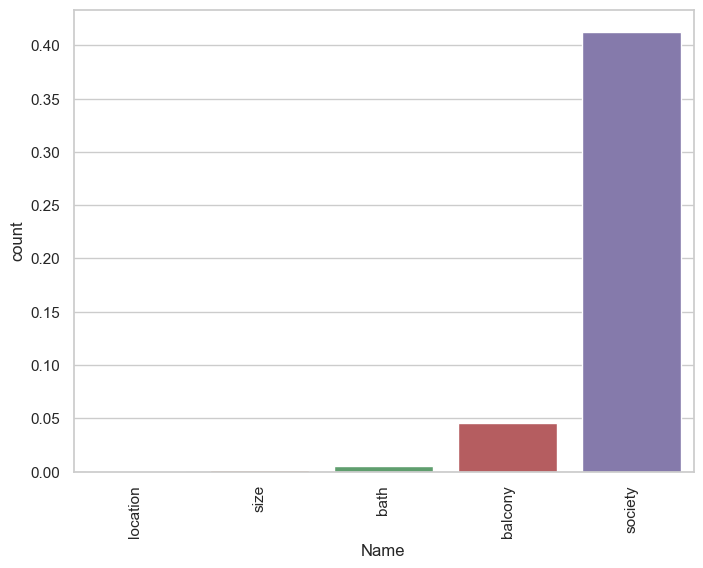

In [11]:
#visualising missing values
missing = missing.to_frame()
missing.columns = ['count']
missing.index.names = ['Name']
missing['Name'] = missing.index


#ploting the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

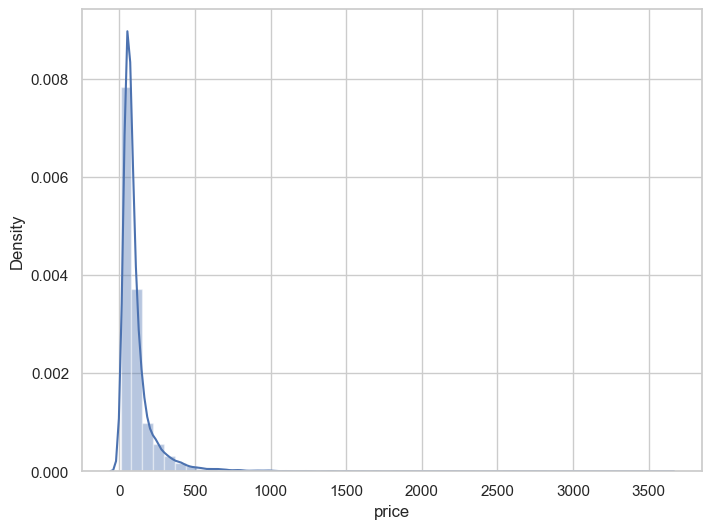

In [12]:
#checking the distribution of the target variable i.e. price
sns.distplot(train["price"])

In [13]:
#skewness of target variable
train["price"].skew()

8.064468821273252

Transformed target 0.8261876136371142


<AxesSubplot:xlabel='price', ylabel='Density'>

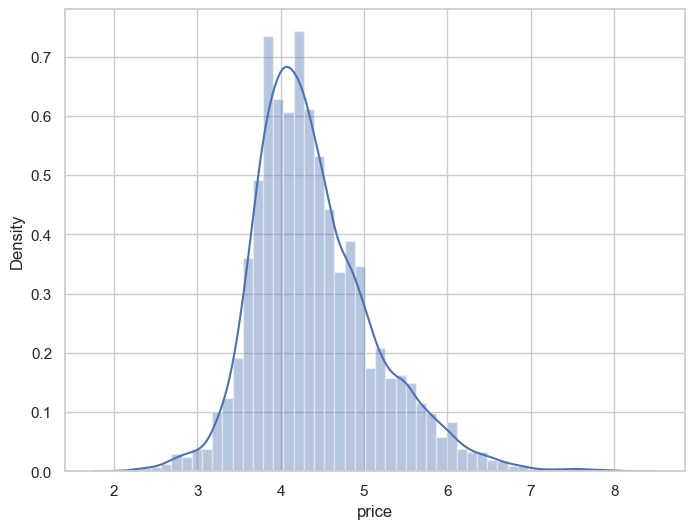

In [14]:
#now transforming the target variable
target = np.log(train['price'])
print("Transformed target", target.skew())
sns.distplot(target)

In [15]:
#separating variables into new data frames
num_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("num_data = {} \ncat_data = {}".format(num_data.shape,cat_data.shape))

num_data = (13320, 3) 
cat_data = (13320, 6)


In [16]:
#understanding categorical variables is using .describe().
cat_data.describe()

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [17]:

at_pivot = train.pivot_table(index = "area_type", values = "price", aggfunc = np.median ) 
# as the target variable "Price" has a right-skewed distribution we use aggfunc as median

at_pivot

,price
area_type,
Built-up Area,70.0
Carpet Area,70.0
Plot Area,140.0
Super built-up Area,65.0


<AxesSubplot:xlabel='area_type'>

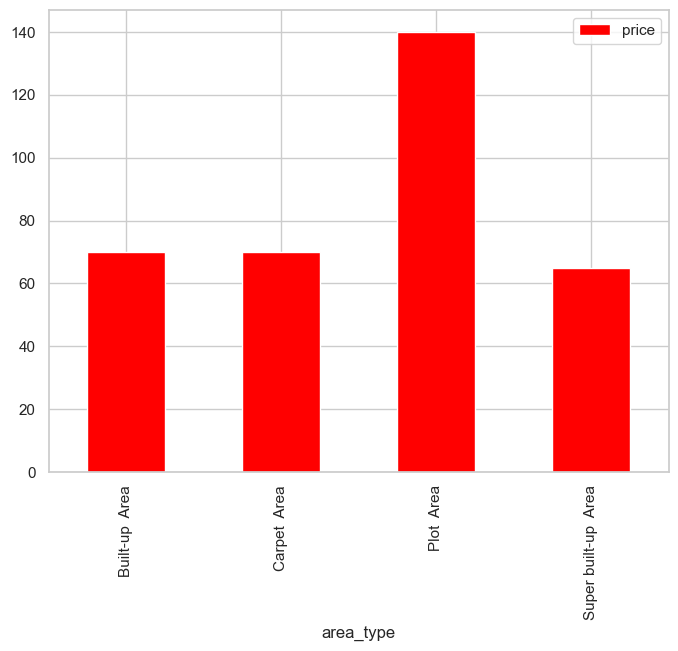

In [18]:
at_pivot.plot(kind='bar',color='red')

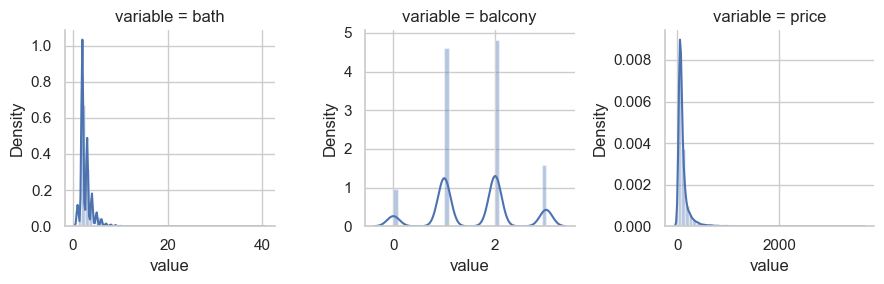

In [19]:
#create numeric dist plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

# Data Pre-Processing

In [20]:
#combining the data set
df_house = train.copy()
df_house.shape

(13320, 9)

In [21]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [22]:
df_house.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [23]:
# droping  missing values of location feature 

df_house.dropna(subset= "location",inplace=True)
df_house["location"].isna().sum()

0

In [24]:
# replacing the Bedroom to BHK in size feature

df_house["size"].replace({'Bedroom': 'BHK'}, regex=True,inplace=True)
df_house["size"] = df_house["size"].str.split(' ').str[0]
df_house["size"] = df_house["size"].astype(float)

In [25]:
# imputing missing values of size feature with mode

df_house["size"].fillna(value= df_house["size"].mode()[0], inplace=True)
df_house["size"].isna().sum()

0

In [26]:
# replacing missing values of society feature as No society

df_house["society"] = df_house["society"].replace(np.nan, "No society")

df_house["society"].isna().sum()

0

In [27]:
# converting the total_sqft feature to float 
#it has many alphanumeric data so we replaced it with nan. 
df_house["total_sqft"] = df_house["total_sqft"].str.split('-').str[0]
df_house["total_sqft"] = pd.to_numeric(df_house['total_sqft'], errors='coerce')


In [28]:
#filling missing value of total_sqft feature with median 
df_house["total_sqft"].fillna(value= df_house["total_sqft"].median(), inplace=True)
df_house["total_sqft"].isna().sum()

0

In [29]:
# imputing missing values of bath  feature with mode
#value= df_house["bath"].mode()[0]
df_house["bath"].fillna(1, inplace=True)
df_house["bath"].isna().sum()

0

In [30]:
# percentage of missing value in balcony feature
per_bal = (df_house["balcony"].isna().sum()/len(df_house['balcony'].axes[0]))*100
per_bal

4.572415346497484

In [31]:
#filling missing value of balcony feature with median 
df_house["balcony"].fillna(value= df_house["balcony"].median(), inplace=True)
df_house["balcony"].isna().sum()

0

# Outlier Detection & Handling

<AxesSubplot:>

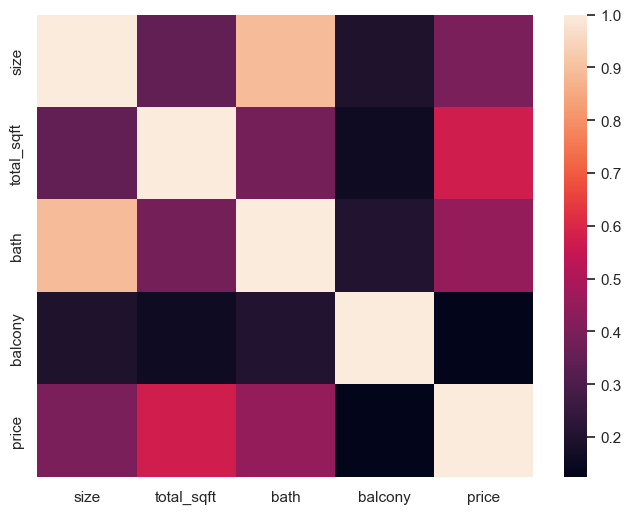

In [32]:
#correlation plot
corr = df_house.corr()
sns.heatmap(corr)

In [33]:
print(corr['price'].sort_values(ascending=False))

price         1.000000
total_sqft    0.574570
bath          0.451928
size          0.398076
balcony       0.124959
Name: price, dtype: float64


<AxesSubplot:>

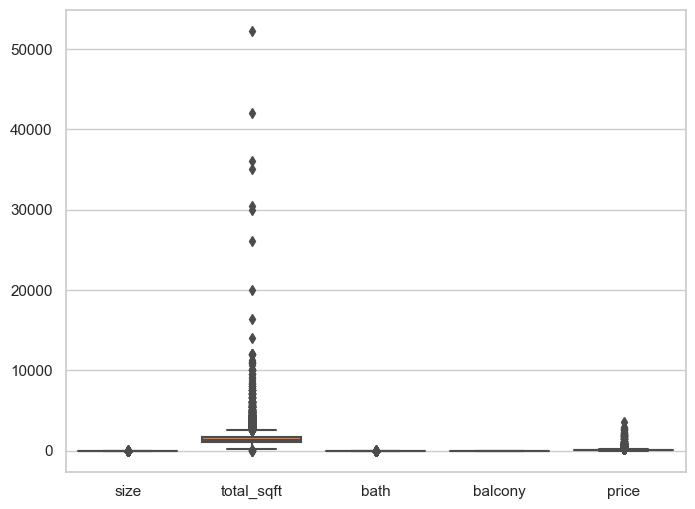

In [34]:
sns.boxplot(data=df_house)

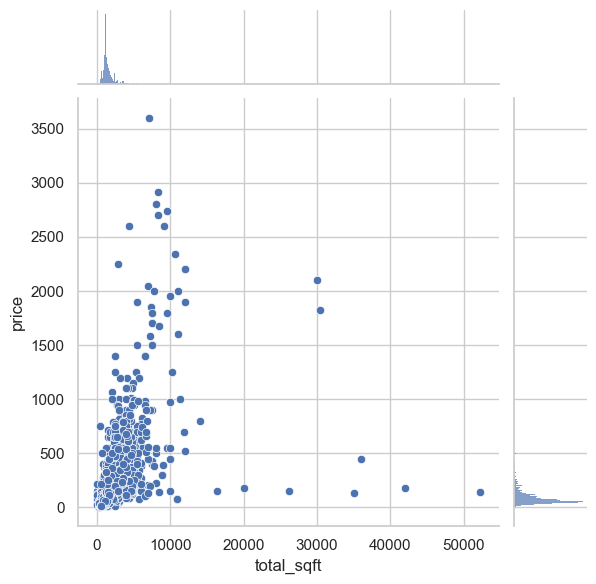

In [35]:
#total_sqft feature
sns.jointplot(x=df_house['total_sqft'], y=train['price'])

In [36]:
df_house.drop(df_house[df_house['total_sqft'] > 5000].index, inplace=True)
df_house.shape

(13195, 9)

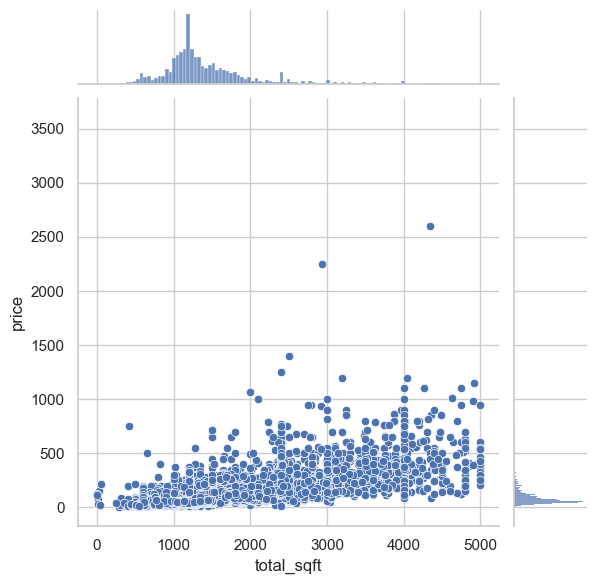

In [37]:
#total_sqft feature
sns.jointplot(x=df_house['total_sqft'], y=train['price'])

### Encoding Categorical Data

In [38]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13195 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13195 non-null  object 
 1   availability  13195 non-null  object 
 2   location      13195 non-null  object 
 3   size          13195 non-null  float64
 4   society       13195 non-null  object 
 5   total_sqft    13195 non-null  float64
 6   bath          13195 non-null  float64
 7   balcony       13195 non-null  float64
 8   price         13195 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.5+ MB


In [39]:
cat = [f for f in df_house.columns if df_house.dtypes[f] == 'object']
print("Categorical feature are : ", cat)

Categorical feature are :  ['area_type', 'availability', 'location', 'society']


In [40]:
# area_type feature
df_house["area_type"].value_counts()

Super built-up  Area    8740
Built-up  Area          2401
Plot  Area              1967
Carpet  Area              87
Name: area_type, dtype: int64

In [41]:
#mapping values 1-4 to the area type feature as it is a ordinal data
df_house["area_type"] = df_house["area_type"].map({"Carpet  Area": 1, 
                                                   "Built-up  Area": 2,
                                                   "Super built-up  Area": 3,
                                                   "Plot  Area": 4}).astype(float)

In [42]:
#unique data in availability feature
df_house["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [43]:
#mapping 0 to data having date and 1 for Ready to move or Immediate Possession.
df_house["availability"] = df_house["availability"].replace(to_replace=r'^(?!Ready To Move$).*', value=0.0, regex=True) #finding data that is not having Ready To Move value 
df_house["availability"] = df_house["availability"].replace(to_replace=r'^(?!0$).*', value=1.0, regex=True)

In [44]:
#now we only have 2 unique value for availability fature
df_house["availability"].unique()

array([0., 1.])

In [45]:
df_house["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [46]:
#frequency encoding the location feature
freqencd_loc = (df_house.groupby('location').size()) / len(df_house)
freqencd_loc

location
 Anekal                 0.000076
 Banaswadi              0.000076
 Basavangudi            0.000076
 Bhoganhalli            0.000076
 Devarabeesana Halli    0.000455
                          ...   
t.c palya               0.000076
tc.palya                0.000303
vinayakanagar           0.000076
white field,kadugodi    0.000076
whitefiled              0.000076
Length: 1293, dtype: float64

In [47]:
df_house['location'] = df_house['location'].apply(lambda x : freqencd_loc[x])

In [48]:
#frequency encoding the society feature
freqencd_sct = (df_house.groupby('society').size()) / len(df_house)
freqencd_sct

society
3Codeli    0.000152
7 ise P    0.000076
A idse     0.000152
A rtsai    0.000076
ACersd     0.000076
             ...   
Zonce E    0.000152
Zostaa     0.000227
i1ncyRe    0.000076
i1odsne    0.000076
i1rtsCo    0.000227
Length: 2675, dtype: float64

In [49]:
df_house['society'] = df_house['society'].apply(lambda x : freqencd_sct[x])

In [50]:
#as we seen our target variable is right skwed 
#transforming the target variable by log
target = np.log(df_house['price'])

In [51]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13195 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13195 non-null  float64
 1   availability  13195 non-null  float64
 2   location      13195 non-null  float64
 3   size          13195 non-null  float64
 4   society       13195 non-null  float64
 5   total_sqft    13195 non-null  float64
 6   bath          13195 non-null  float64
 7   balcony       13195 non-null  float64
 8   price         13195 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


# Model Training and Evaluation

In [52]:
x = df_house.drop(["price"], axis=1)
y = target

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

### Lasso Regularization

In [55]:
from sklearn.linear_model import Lasso

In [56]:
param = {"alpha":[1e-10,1e-15,1e-3,20,13,23,4,5,64,66,77,12,44], "max_iter":[1000,2000,3000,4000,5000]}

In [57]:
house_lasso = Lasso()
grid = GridSearchCV(house_lasso, param, scoring= "neg_mean_squared_error",cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-15, 0.001, 20, 13, 23, 4, 5, 64,
                                   66, 77, 12, 44],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             scoring='neg_mean_squared_error')

In [58]:
grid.best_params_

{'alpha': 1e-10, 'max_iter': 1000}

In [59]:
house_lasso = Lasso(alpha=1e-10, max_iter = 1000)
house_lasso.fit(x_train, y_train)

Lasso(alpha=1e-10)

In [60]:
house_lasso.score(x_train, y_train)

0.6513771540914237

In [61]:
house_lasso.score(x_test, y_test)

0.6407177720842953

In [62]:
y_pred_lasso = house_lasso.predict(x_test)

In [63]:
np.sqrt(mean_squared_error(y_test,y_pred_lasso))

0.40475780924374766

### XGB with RandomizedSearchCV

In [64]:
params = {'min_child_weight':[1,1.5,2,2.5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4,5,6], 'random_state': [42]}

In [65]:
import xgboost as xgb

xgb = xgb.XGBRegressor(nthread=-1)

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
random_xgb = RandomizedSearchCV(xgb, params)
random_xgb.fit(x_train ,y_train )


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          nthread=-1, num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0.3, 0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_child_weight': [1, 1.5, 2, 2.5],
                                        'random_state': [42],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [68]:
random_xgb.best_params_

{'subsample': 0.9,
 'random_state': 42,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [69]:
random_xgb.best_score_

0.7870633988217497

In [70]:
import xgboost as xgb

random_xgb = xgb.XGBRegressor(subsample = 0.9,
             random_state = 42,
             min_child_weight = 1.5,
             max_depth = 6,
             gamma = 0.4,
             colsample_bytree = 0.8,
             nthread=-1)
random_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1.5,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, ...)

In [71]:
random_xgb.score(x_train,y_train)

0.8657528625437387

In [72]:
random_xgb.score(x_test,y_test)

0.7820669205061899

In [73]:
y_pred = random_xgb.predict(x_test)

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.3152382782907494